# Blossoming Date Prediction
In this exercise we will predict the flowering date of cherry blossoms at Hirosaki Park in Hirosaki City, Aomori Prefecture, Japan using a Nueral Network by analyzing the temperature data and previous flowering information (from 1997 - 2019).

In [1]:
import numpy as np
import pandas as pd

## Step 1. Import Data

In [2]:
data_blossom = pd.read_csv('hirosaki_temp_cherry_bloom.csv')
data_blossom.head(5)

,date,temperature,flower_status
0,1997/1/1,2.9,NaN
1,1997/1/2,2.2,NaN
2,1997/1/3,-1.6,NaN
3,1997/1/4,0.2,NaN
4,1997/1/5,-0.4,NaN


In [3]:
df_blossom = pd.DataFrame(data_blossom)

# Adding 3 new cols: split date into year,month,day
dateList = df_blossom['date'].str.split('/', expand=True)
df_blossom['year'], df_blossom['month'], df_blossom['day'] = dateList[0], dateList[1], dateList[2]
df_blossom.info()
df_blossom.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8400 non-null   object 
 1   temperature    8400 non-null   float64
 2   flower_status  69 non-null     object 
 3   year           8400 non-null   object 
 4   month          8400 non-null   object 
 5   day            8400 non-null   object 
dtypes: float64(1), object(5)
memory usage: 393.9+ KB


,date,temperature,flower_status,year,month,day
0,1997/1/1,2.9,NaN,1997,1,1
1,1997/1/2,2.2,NaN,1997,1,2
2,1997/1/3,-1.6,NaN,1997,1,3
3,1997/1/4,0.2,NaN,1997,1,4
4,1997/1/5,-0.4,NaN,1997,1,5


## Step 2. Data Cleaning and Preprocessing

In [4]:
df_blossom['flower_status'].unique()

array([nan, 'bloom', 'full', 'scatter'], dtype=object)

In [5]:
new_df_blossom = []

# 0:Before blooming, 1:Bloom, 2:Full bloom, 3:Scatter
# Note that we consider the status of flower to be 0 at the begining of the year
# and we fill in all NaN as below:
# NaN NaN NaN 1 NaN NaN 2 NaN NaN NaN 3 NaN NaN -->
# 0 0 0 1 1 1 2 2 2 2 3 3 3

for i in range(len(df_blossom)):
    if ((df_blossom['month'][i] == '1') & (df_blossom['day'][i] == '1')):
        status = 0
    elif(df_blossom['flower_status'][i] == 'bloom'):
        status = 1
    elif(df_blossom['flower_status'][i] == 'full'):
        status = 2
    elif(df_blossom['flower_status'][i] == 'scatter'):
        status = 3
    
    new_df_blossom.append({'year':df_blossom['year'][i],
                           'month':df_blossom['month'][i],
                           'day':df_blossom['day'][i], 
                           'temperature':df_blossom['temperature'][i],
                           'flower_status':status})

new_df_blossom = pd.DataFrame(new_df_blossom)
print(new_df_blossom)

      year month day  temperature  flower_status
0     1997     1   1          2.9              0
1     1997     1   2          2.2              0
2     1997     1   3         -1.6              0
3     1997     1   4          0.2              0
4     1997     1   5         -0.4              0
...    ...   ...  ..          ...            ...
8395  2019    12  27         -0.2              3
8396  2019    12  28         -1.3              3
8397  2019    12  29         -0.6              3
8398  2019    12  30          1.8              3
8399  2019    12  31         -0.2              3

[8400 rows x 5 columns]


In [6]:
new_df_blossom['flower_status'].unique()

array([0, 1, 2, 3])

In [7]:
new_df_blossom.head(5)

,year,month,day,temperature,flower_status
0,1997,1,1,2.9,0
1,1997,1,2,2.2,0
2,1997,1,3,-1.6,0
3,1997,1,4,0.2,0
4,1997,1,5,-0.4,0


In [8]:
new_df_blossom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8400 non-null   object 
 1   month          8400 non-null   object 
 2   day            8400 non-null   object 
 3   temperature    8400 non-null   float64
 4   flower_status  8400 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 328.2+ KB


In [9]:
new_df_blossom.flower_status.value_counts()

3    5648
0    2537
1     127
2      88
Name: flower_status, dtype: int64

In [10]:
# Since most of our flower_status data is 0 or 3 we focus on the months when it is more likely to have blossoms 
# March, April, May
new_df_blossom = new_df_blossom.loc[(new_df_blossom['month'] == '3') | 
                                    (new_df_blossom['month'] == '4') |
                                    (new_df_blossom['month'] == '5') ]
new_df_blossom.reset_index(drop=True, inplace=True)

## Step 3. Split Data to Train and Test Sets

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = new_df_blossom.drop('flower_status', axis = 1)
y = new_df_blossom['flower_status']

X = X.astype('float64')
y = y.astype('int32')

features = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3)

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2116 entries, 0 to 2115
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         2116 non-null   float64
 1   month        2116 non-null   float64
 2   day          2116 non-null   float64
 3   temperature  2116 non-null   float64
dtypes: float64(4)
memory usage: 66.2 KB


In [13]:
y_test.value_counts()

0    353
3    223
1     35
2     24
Name: flower_status, dtype: int64

## Step 4. Our Model (Neural Network - MLPClassifier)

In [14]:
from sklearn import neural_network

clf = neural_network.MLPClassifier(max_iter=1000,       # default:200
                                   activation="relu",   # default:"relu"
                                   solver="adam",       # default:"adam"
                                   alpha=0.0001,        # default:0.0001
                                   verbose=True,        # default:False
                                   early_stopping=False)# default:False
# fit our model
clf.fit(X_train, y_train)

Iteration 1, loss = 1.35057868
Iteration 2, loss = 1.23333781
Iteration 3, loss = 1.13863914
Iteration 4, loss = 1.06236393
Iteration 5, loss = 0.99978717
Iteration 6, loss = 0.94761075
Iteration 7, loss = 0.90471196
Iteration 8, loss = 0.86529212
Iteration 9, loss = 0.83154925
Iteration 10, loss = 0.80056069
Iteration 11, loss = 0.77185861
Iteration 12, loss = 0.74422368
Iteration 13, loss = 0.71869487
Iteration 14, loss = 0.69507559
Iteration 15, loss = 0.67318989
Iteration 16, loss = 0.65334377
Iteration 17, loss = 0.63448556
Iteration 18, loss = 0.61731953
Iteration 19, loss = 0.60148103
Iteration 20, loss = 0.58669883
Iteration 21, loss = 0.57307026
Iteration 22, loss = 0.56023860
Iteration 23, loss = 0.54823722
Iteration 24, loss = 0.53699665
Iteration 25, loss = 0.52619678
Iteration 26, loss = 0.51604581
Iteration 27, loss = 0.50643704
Iteration 28, loss = 0.49739774
Iteration 29, loss = 0.48857926
Iteration 30, loss = 0.48047863
Iteration 31, loss = 0.47267915
Iteration 32, los

Iteration 255, loss = 0.24996536
Iteration 256, loss = 0.25043904
Iteration 257, loss = 0.25041149
Iteration 258, loss = 0.25013648
Iteration 259, loss = 0.24998335
Iteration 260, loss = 0.24930259
Iteration 261, loss = 0.24944699
Iteration 262, loss = 0.24991756
Iteration 263, loss = 0.24952486
Iteration 264, loss = 0.24953532
Iteration 265, loss = 0.24924048
Iteration 266, loss = 0.24919683
Iteration 267, loss = 0.24936531
Iteration 268, loss = 0.24935665
Iteration 269, loss = 0.24996325
Iteration 270, loss = 0.24850983
Iteration 271, loss = 0.24929849
Iteration 272, loss = 0.24879606
Iteration 273, loss = 0.24904276
Iteration 274, loss = 0.24867559
Iteration 275, loss = 0.24854848
Iteration 276, loss = 0.24860837
Iteration 277, loss = 0.24825079
Iteration 278, loss = 0.24845594
Iteration 279, loss = 0.24832549
Iteration 280, loss = 0.24832675
Iteration 281, loss = 0.24830462
Iteration 282, loss = 0.24883532
Iteration 283, loss = 0.24805637
Iteration 284, loss = 0.24842766
Iteration 

MLPClassifier(max_iter=1000, verbose=True)

## Step 5. Plot the Test Results

In [15]:
predict = clf.predict(X_test)

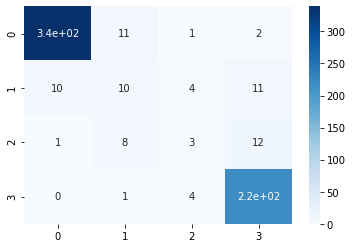

<Figure size 1152x432 with 0 Axes>

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.figure(figsize=(16,6))
plt.show()

In [17]:
classReport = classification_report(y_test, predict)
print(classReport)

score = accuracy_score(y_test, predict)
print('accuracy :', '{:.5f}'.format(score))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       353
           1       0.33      0.29      0.31        35
           2       0.25      0.12      0.17        24
           3       0.90      0.98      0.94       223

    accuracy                           0.90       635
   macro avg       0.61      0.59      0.59       635
weighted avg       0.88      0.90      0.89       635

accuracy : 0.89764
